In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", palette="Set2")


In [2]:
# Step 2. Load the Dataset
file_path = "tip.csv"  # adjust path if needed
df = pd.read_csv(file_path)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Step 3. Basic Information
print("----- Basic Info -----")
print(df.info())

----- Basic Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [4]:
# Step 4. Check for Missing Values
print("\n----- Missing Values -----")
print(df.isnull().sum())


----- Missing Values -----
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
# Step 5. Dataset Shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")



Dataset contains 244 rows and 7 columns.


In [6]:
# Step 6. Summary Statistics
print("\n----- Summary Statistics (Numeric Columns) -----")
df.describe()


----- Summary Statistics (Numeric Columns) -----


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
print("\n----- Summary Statistics (Categorical Columns) -----")
df.describe(include=['object'])


----- Summary Statistics (Categorical Columns) -----


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [8]:
# Step 7. Unique Values in Categorical Columns
print("\n----- Unique Values per Categorical Column -----")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


----- Unique Values per Categorical Column -----
sex: ['Female' 'Male']
smoker: ['No' 'Yes']
day: ['Sun' 'Sat' 'Thur' 'Fri']
time: ['Dinner' 'Lunch']


In [9]:
# Step 8. Correlation Analysis
print("\n----- Correlation Matrix -----")
corr = df.corr(numeric_only=True)
corr


----- Correlation Matrix -----


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


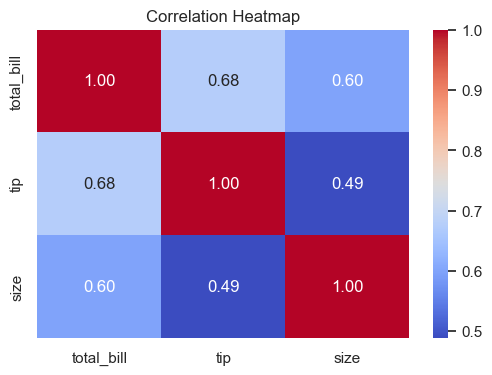

In [10]:
# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Visualise 

In [11]:
# Step 9. Univariate Analysis
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

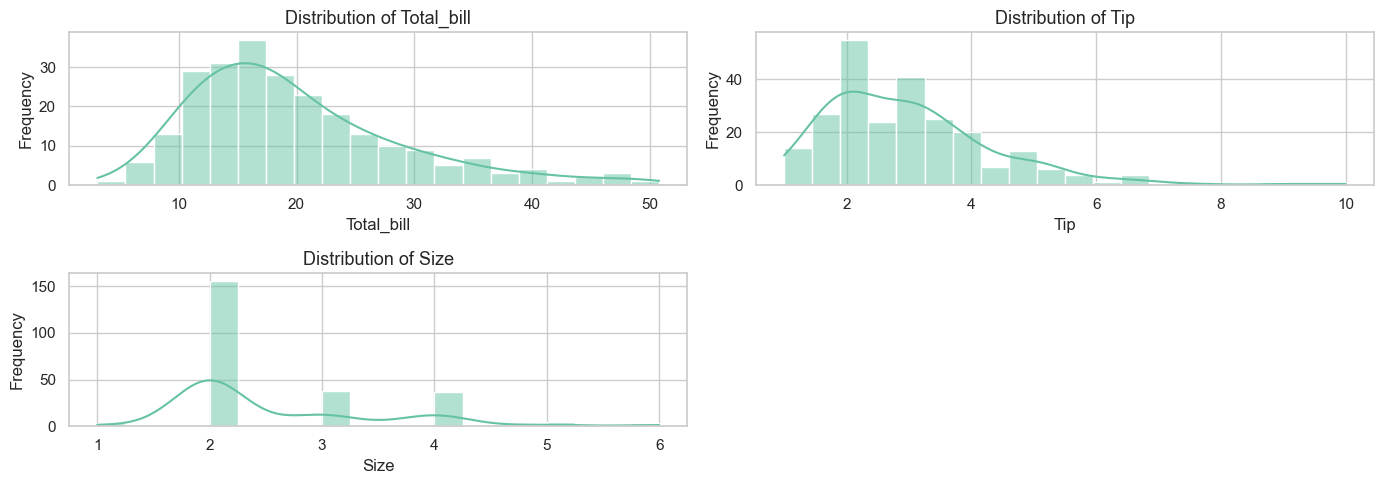

In [12]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 5 * 1))
axes = axes.flatten()

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col.capitalize()}", fontsize=13)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Frequency")

# Hide any empty subplot slots if the number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.tight_layout()
plt.show()

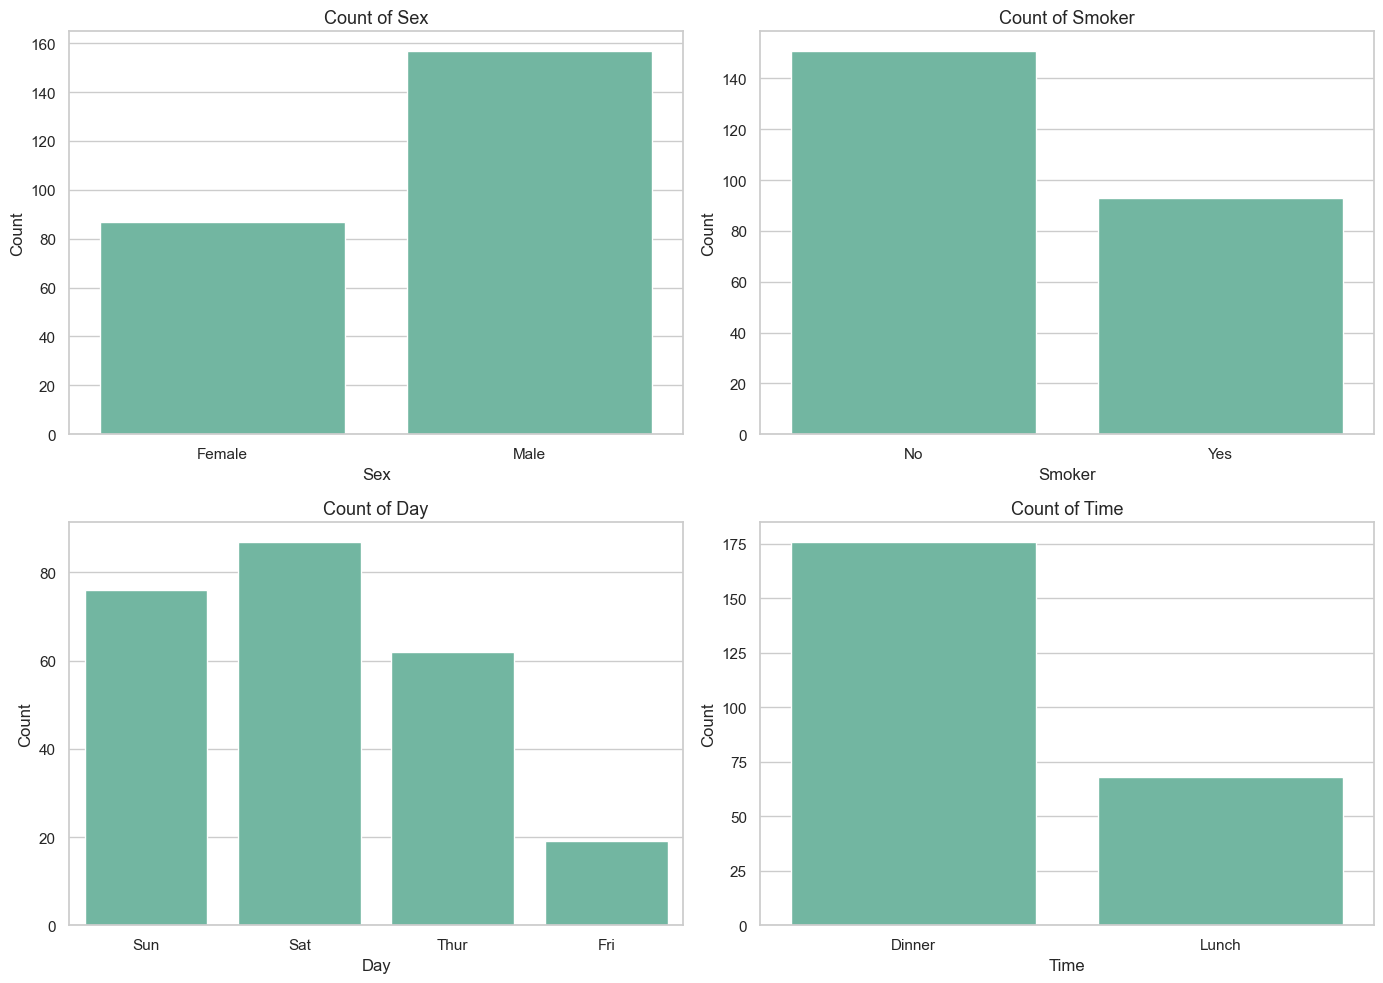

In [13]:
# Countplots for categorical columns
# Create a grid: 2 rows × 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Count of {col.capitalize()}", fontsize=13)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

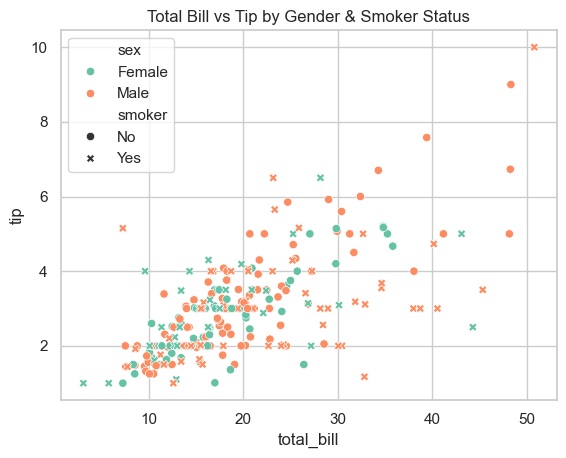

In [14]:
# Step 10. Bivariate Analysis
# Numerical vs Numerical
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='smoker')
plt.title("Total Bill vs Tip by Gender & Smoker Status")
plt.show()

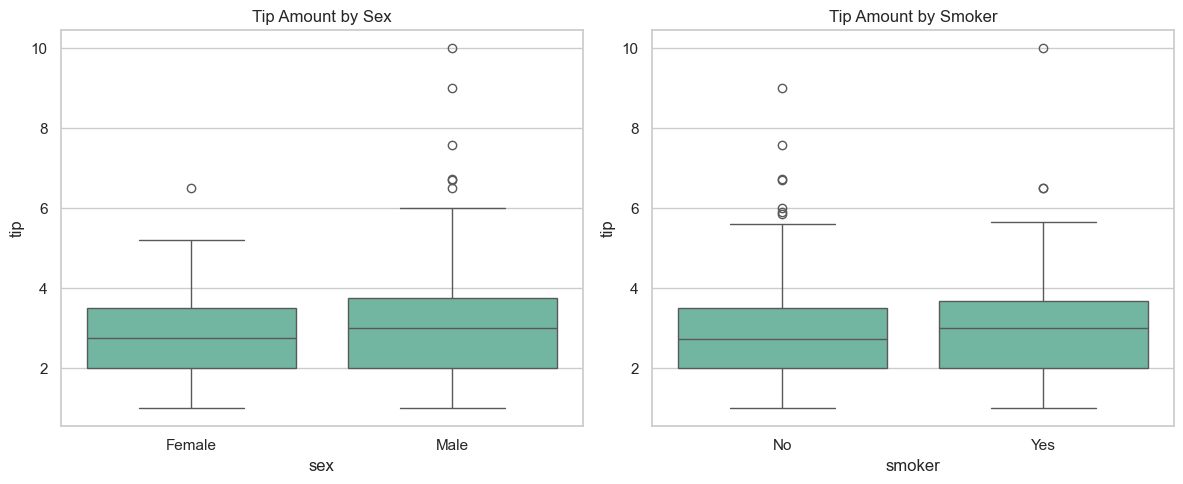

In [15]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row × 2 columns

# First plot: Tip vs Sex
sns.boxplot(data=df, x='sex', y='tip', ax=axes[0])
axes[0].set_title("Tip Amount by Sex")

# Second plot: Tip vs Smoker
sns.boxplot(data=df, x='smoker', y='tip', ax=axes[1])
axes[1].set_title("Tip Amount by Smoker")

# Adjust spacing between plots
plt.tight_layout()
plt.show()

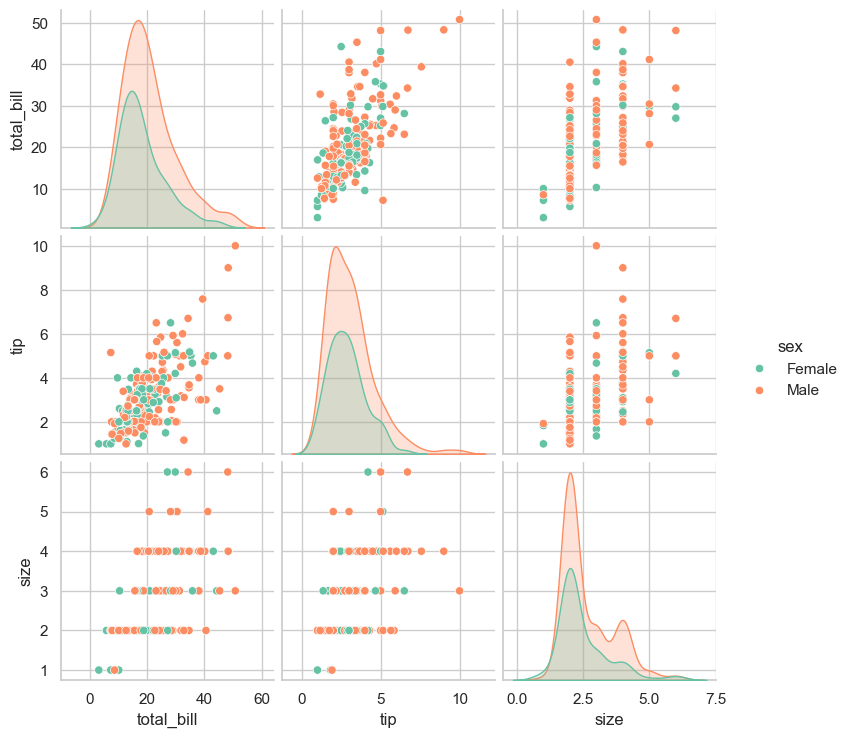

In [16]:
#Pairplot for Overall Relationships
sns.pairplot(df, hue="sex", diag_kind="kde")
plt.show()

# ----- Key Insights -----

1. **The average total bill and tip increase together (positive correlation).**
2. **Males tend to give slightly higher tips on average.**
3. **Dinner time shows higher bills and tips compared to lunch.**
4. **Sunday has the highest frequency of customers.**
5. **Non-smokers appear to have slightly higher total bills.**

# ML

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform

In [18]:
# Quick feature engineering
# Add tip_pct (tip divided by total_bill) 
df['tip_pct'] = df['tip'] / df['total_bill']

# If any infinite / NaN (shouldn't be), handle them:
df['tip_pct'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['tip_pct'].fillna(df['tip_pct'].median(), inplace=True)

In [19]:
# Define target and features
TARGET = 'tip'
FEATURES = ['total_bill', 'size', 'sex', 'smoker', 'day', 'time', 'tip_pct']

# Validate all features exist
missing = [col for col in FEATURES if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")

# Split data
X = df[FEATURES].copy()
y = df[TARGET].copy()


In [20]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (195, 7), Test shape: (49, 7)


In [21]:
# Preprocessing pipelines
numeric_features = ['total_bill', 'size', 'tip_pct']
categorical_features = ['sex', 'smoker', 'day', 'time']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')

In [36]:
#Define models in Pipelines
models = {
    'LinearRegression': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', LinearRegression())]),

    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', RandomForestRegressor(random_state=42))]),

    'GradientBoosting': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', GradientBoostingRegressor(random_state=42))])
}


In [68]:
# Dictionary to store results
baseline_results = {}

#Train baseline models (without cross-validation)
for name, pipe in models.items():
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Save results
    baseline_results[name] = {"rmse": rmse, "mae": mae, "r2": r2}



Training LinearRegression...
Training RandomForest...
Training GradientBoosting...


In [69]:
# ---- Convert results to DataFrame ----
baseline_df = pd.DataFrame([
    {"Model": name, "RMSE": vals["rmse"], "MAE": vals["mae"], "R²": vals["r2"]}
    for name, vals in baseline_results.items()
])

# Sort by R² (best performance first)
baseline_df = baseline_df.sort_values(by="R²", ascending=False).reset_index(drop=True)

# ---- Display nicely ----
styled_baseline = (
    baseline_df
    .style
    .format({"RMSE": "{:.4f}", "MAE": "{:.4f}", "R²": "{:.4f}"})
    .background_gradient(subset=["R²"], cmap="Blues")
)

display(styled_baseline)

,Model,RMSE,MAE,R²
0,GradientBoosting,0.1625,0.1938,0.8700
1,RandomForest,0.2019,0.2293,0.8385
2,LinearRegression,0.2427,0.3488,0.8059


# Hyperparameter tuning

In [40]:
param_distributions = {
    'RandomForest': {
        'regressor__n_estimators': randint(50, 400),
        'regressor__max_depth': randint(2, 20),
        'regressor__min_samples_split': randint(2, 10),
        'regressor__min_samples_leaf': randint(1, 6)
    },
    'GradientBoosting': {
        'regressor__n_estimators': randint(50, 400),
        'regressor__learning_rate': uniform(0.01, 0.5),
        'regressor__max_depth': randint(2, 8),
        'regressor__subsample': uniform(0.5, 0.5)
    }
}

In [42]:
best_estimators = {}
n_iter_search = 40

for model_name, param in param_distributions.items():
    print(f"\nTuning {model_name} with RandomizedSearchCV...")
    pipe = models[model_name]
    
    rsearch = RandomizedSearchCV(pipe, param_distributions=param,
                                 n_iter=n_iter_search, cv=5,
                                 scoring='neg_root_mean_squared_error',
                                 random_state=42, n_jobs=-1, verbose=1)
    rsearch.fit(X_train, y_train)
    print(f"Best RMSE (cv): {-rsearch.best_score_:.4f}")
    print("Best params:", rsearch.best_params_)
    best_estimators[model_name] = rsearch.best_estimator_



Tuning RandomForest with RandomizedSearchCV...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best RMSE (cv): 0.4308
Best params: {'regressor__max_depth': 13, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 108}

Tuning GradientBoosting with RandomizedSearchCV...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best RMSE (cv): 0.3072
Best params: {'regressor__learning_rate': np.float64(0.2352496259847715), 'regressor__max_depth': 3, 'regressor__n_estimators': 138, 'regressor__subsample': np.float64(0.9828160165372797)}


In [30]:
#Compare best models on test set
candidates = {
    'LinearRegression': models['LinearRegression'].fit(X_train, y_train),
    'RandomForest_best': best_estimators.get('RandomForest', models['RandomForest'].fit(X_train, y_train)),
    'GradientBoosting_best': best_estimators.get('GradientBoosting', models['GradientBoosting'].fit(X_train, y_train))
}

def evaluate_on_test(pipeline, X_test, y_test):
    preds = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return rmse, mae, r2, preds


In [65]:
import pandas as pd
from IPython.display import display

# ---- Convert to DataFrame ----
results_df = pd.DataFrame([
    {"Model": name, "RMSE": vals["rmse"], "MAE": vals["mae"], "R²": vals["r2"]}
    for name, vals in results.items()
])

# Sort by best performance (R² descending)
results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)

# ---- Display nicely ----
styled_table = (
    results_df
    .style
    .format({"RMSE": "{:.4f}", "MAE": "{:.4f}", "R²": "{:.4f}"})
    .background_gradient(subset=["R²"], cmap="Greens")
)

display(styled_table)


,Model,RMSE,MAE,R²
0,GradientBoosting_best,0.1272,0.1815,0.8982
1,RandomForest_best,0.2049,0.2327,0.8361
2,LinearRegression,0.2427,0.3488,0.8059


✅ Table saved as 'model_results.csv'


In [32]:
#Select best model by RMSE
best_name = min(results.keys(), key=lambda k: results[k]['rmse'])
best_model = candidates[best_name]
print(f"\nSelected best model: {best_name} (RMSE={results[best_name]['rmse']:.4f})")




Selected best model: GradientBoosting_best (RMSE=0.1272)


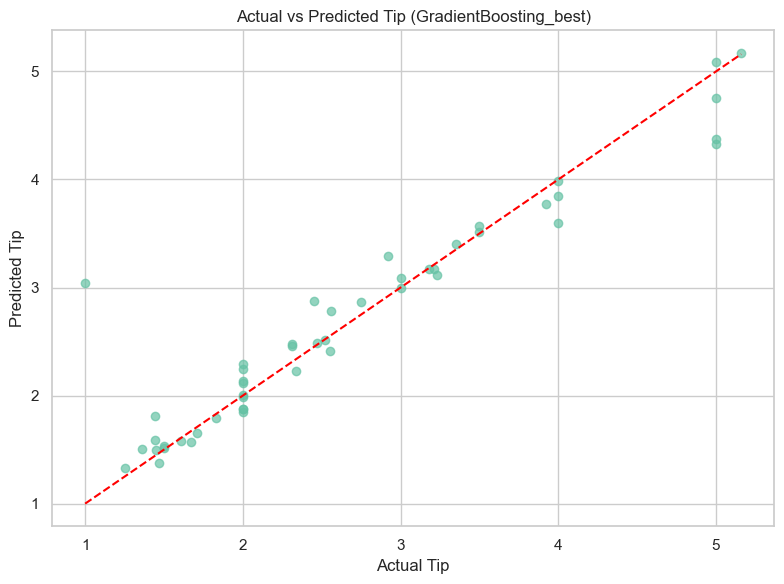

In [33]:
# Plot predictions vs actual for best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, results[best_name]['preds'], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title(f"Actual vs Predicted Tip ({best_name})")
plt.tight_layout()
plt.show()

In [34]:
# Feature importance (if tree-based)
if 'RandomForest' in best_name or 'GradientBoosting' in best_name:
    # Extract numeric + one-hot feature names after preprocessor
    preproc = best_model.named_steps['preprocessor']
    # Get numeric feature names
    num_feats = numeric_features
    # Get categorical one-hot names
    cat_ohe = preproc.named_transformers_['cat'].named_steps['onehot']
    cat_feat_names = list(cat_ohe.get_feature_names_out(categorical_features))
    feature_names = num_feats + cat_feat_names

    # Get importances
    importances = best_model.named_steps['regressor'].feature_importances_
    fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    fi_df.sort_values('importance', ascending=False, inplace=True)
    print("\nTop feature importances:")
    print(fi_df.head(10))



Top feature importances:
       feature  importance
0   total_bill    0.523406
2      tip_pct    0.473430
1         size    0.001070
5    smoker_No    0.000905
6   smoker_Yes    0.000659
9      day_Sun    0.000222
4     sex_Male    0.000129
3   sex_Female    0.000069
10    day_Thur    0.000038
8      day_Sat    0.000036


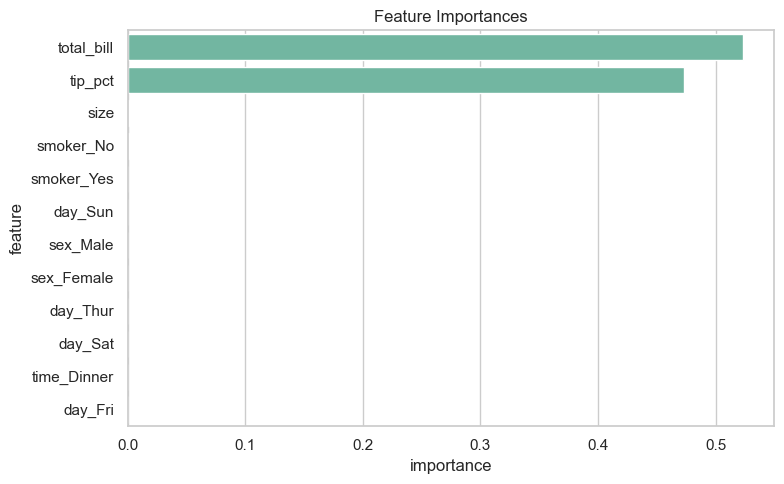

In [35]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=fi_df.head(12), x='importance', y='feature')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()